In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import numpy as np

In [2]:
def generate_ef_graph(results) :
    ef_data = []
    #bedroc_data = []
    for ranker in results :
        for percentage in results[ranker] :
            for fraction, value in results[ranker][percentage]['ef'].items() :
                ef_data.append([ranker, int(percentage), float(fraction), float(value)])
        #bedroc_data.append([ranker, float(results[ranker]['bedroc'])])
    columns = ['ranker', 'percentage', 'fraction', 'value']
    ef_df = pd.DataFrame(ef_data, columns=columns)
    ef_df = ef_df[ef_df['fraction'] == 0.2]
    ef_df = ef_df[ef_df['percentage'] <= 50]
    #plt.figure(figsize=(15, 8))
    sns.lineplot(data=ef_df, x='percentage', y='value', hue='ranker')
    plt.xlabel('Percentage of generated conformation')
    plt.ylabel('Enrichment factor')
    plt.ylim(0)

In [3]:
results_path = '/home/bb596/hdd/gold_docking_dude/jak2/results_docking_score.json'
with open(results_path, 'r') as f :
    results = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/home/bb596/hdd/gold_docking_dude/jak2/results_docking_score.json'

In [4]:
generate_ef_graph(results)
plt.ylim(0, 20)
plt.savefig(os.path.join('figures', 'VS_JAK2_flexible.png'), dpi=300)

KeyError: 'ef'

In [ ]:
results_path = '/media/benoit/New Volume/data/gold_docking_dude/jak2_rigid/results_docking_score.json'
with open(results_path, 'r') as f :
    results = json.load(f)

In [ ]:
generate_ef_graph(results)
plt.ylim(0, 20)
plt.savefig(os.path.join('figures', 'VS_JAK2_rigid.png'), dpi=300)

In [ ]:
from pdbbind_metadata_processor import PDBBindMetadataProcessor
pdbbind_metadata_processor = PDBBindMetadataProcessor()
table = pdbbind_metadata_processor.get_master_dataframe()

In [ ]:
file_path = 'data/ligand_random_splits/train_smiles_random_split_0.txt'
with open(file_path, 'r') as f :
    random_split_smiles = f.readlines()
    random_split_smiles = [line.strip() for line in random_split_smiles]

In [ ]:
smiles_data = pd.read_csv('data/smiles_df.csv')

In [ ]:
training_pdbs = smiles_data[(smiles_data['smiles'].isin(random_split_smiles))
                           & (smiles_data['dataset'] == 'pdbbind')
                           & (smiles_data['included'])]['pdb_id'].values

In [ ]:
training_table = table[table['PDB code'].isin(training_pdbs)]

In [ ]:
training_table['protein name'].str.contains('JAK2').sum()

In [ ]:
training_table['protein name'].unique()

In [ ]:
training_table[training_table['protein name'].str.contains('DOPAMINE')]

In [ ]:
training_table[training_table['protein name'].str.contains('JAK2')].head()

In [ ]:
results_path = 'gold_docking_dude/drd3/results_docking_score.json'
with open(results_path, 'r') as f :
    results = json.load(f)

In [ ]:
generate_ef_graph(results)
plt.ylim(0, 4)
plt.savefig(os.path.join('figures', 'VS_DRD3_flexible.png'), dpi=300)

In [ ]:
def generate_ef_graph(results) :
    ef_data = []
    #bedroc_data = []
    for ranker in results :
        for percentage in results[ranker] :
            for fraction, value in results[ranker][percentage]['ef'].items() :
                ef_data.append([ranker, int(percentage), float(fraction), float(value)])
        #bedroc_data.append([ranker, float(results[ranker]['bedroc'])])
    columns = ['ranker', 'percentage', 'fraction', 'value']
    ef_df = pd.DataFrame(ef_data, columns=columns)
    ef_df = ef_df[ef_df['ranker'] != 'score']
    for fraction in np.around(np.arange(0, 0.11, 0.01), 2) :
        ef_df_fraction = ef_df[ef_df['fraction'] == fraction]
        #ef_df = ef_df[ef_df['percentage'] <= 50]
        
        plt.figure(figsize=(8, 5))
        sns.lineplot(data=ef_df_fraction, x='percentage', y='value', hue='ranker')
        plt.xlabel('Percentage of generated conformation')
        plt.ylabel(f'Enrichment factor at fraction {fraction}')
        plt.ylim(0)

In [ ]:
results_path = 'gold_docking_dude/drd3_rigid/results_docking_score_percentage.json'
with open(results_path, 'r') as f :
    results = json.load(f)
generate_ef_graph(results)

In [ ]:
results_path = 'gold_docking_dude/jak2_rigid/results_docking_score_percentage.json'
with open(results_path, 'r') as f :
    results = json.load(f)
generate_ef_graph(results)

In [ ]:
results_path = 'gold_docking_dude/jak2/results_docking_score_percentage.json'
with open(results_path, 'r') as f :
    results = json.load(f)
generate_ef_graph(results)

In [4]:
def custom_ranker_order(series) :
    ranked_list = ['Random', 'UFF energy', 'CCDC',
                   'BioSchNet (random split)',
                   'BioSchNet (scaffold split)',
                   'BioSchNet (protein split)',
                   'PLP score']
    d = {ranker : i 
         for i, ranker in enumerate(ranked_list)}
    return [d[s] for s in series]

In [5]:
def generate_bedroc_graph(results) :
    bedroc_data = []
    for ranker in results :
        for percentage in results[ranker] :
            bedroc_data.append([ranker, int(percentage), float(results[ranker][percentage]['bedroc'])])
    columns = ['Ranker', 'percentage', 'value']
    bedroc_df = pd.DataFrame(bedroc_data, columns=columns)
    bedroc_df = bedroc_df[bedroc_df['Ranker'] != 'score']
    bedroc_df['Ranker'] = bedroc_df['Ranker'].replace({
        'model_random' : 'BioSchNet (random split)',
        'model_scaffold' : 'BioSchNet (scaffold split)',
        'model_protein' : 'BioSchNet (protein split)',
    'random' : 'Random',
    'energy' : 'UFF energy',
    'ccdc' : 'CCDC'})
    
    bedroc_df = bedroc_df.sort_values('Ranker', key=custom_ranker_order)
    
    #bedroc_df = bedroc_df[~(bedroc_df['Ranker'].isin(['BioSchNet (scaffold split)', 'BioSchNet (protein split)']))]
    xlabel = 'Fraction of ranked conformations'
    bedroc_df[xlabel] = bedroc_df['percentage'] / 100

    plt.figure(figsize=(8, 5))
    sns.lineplot(data=bedroc_df, x=xlabel, y='value', hue='Ranker', style='Ranker')
    #plt.xlabel('Percentage of ranked generated conformation')
    plt.ylabel(f'BEDROC')
    plt.ylim(0)

In [6]:
def plot_target(target, rigid=True) :
    with sns.plotting_context('talk') :
        if rigid :
            print('rigid')
            results_path = f'/home/bb596/hdd/gold_docking_dude/{target}_rigid/results_docking_score_percentage.json'
            with open(results_path, 'r') as f :
                results = json.load(f)
            generate_bedroc_graph(results)
            plt.title(f'{target} (Rigid docking)')
            #plt.show()
        else :
            print('flexible')
            results_path = f'/home/bb596/hdd/gold_docking_dude/{target}/results_docking_score_percentage.json'
            with open(results_path, 'r') as f :
                results = json.load(f)
            generate_bedroc_graph(results)
            plt.title(f'{target} (Flexible docking)')
            #plt.show()

flexible
rigid


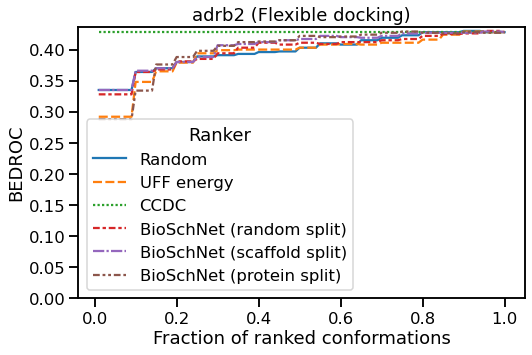

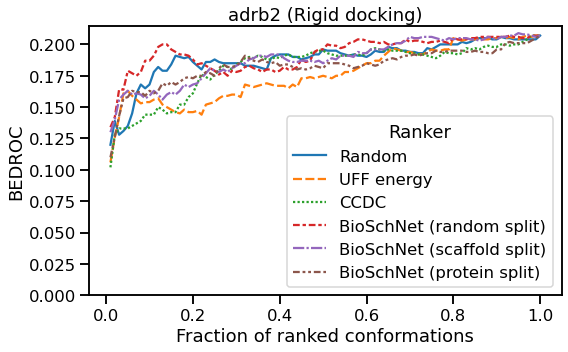

In [6]:
target = 'adrb2'
plot_target(target, rigid=False)
plot_target(target, rigid=True)
plt.tight_layout()
plt.savefig(f'figures/{target}_rigid_dude.png', dpi=300)

rigid
flexible


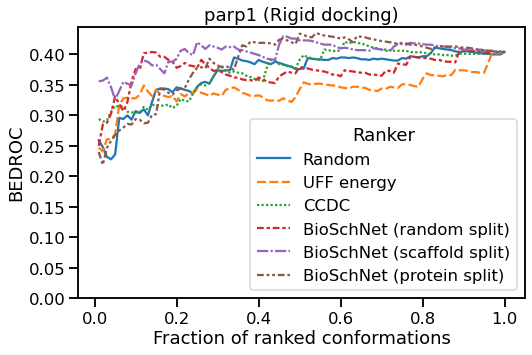

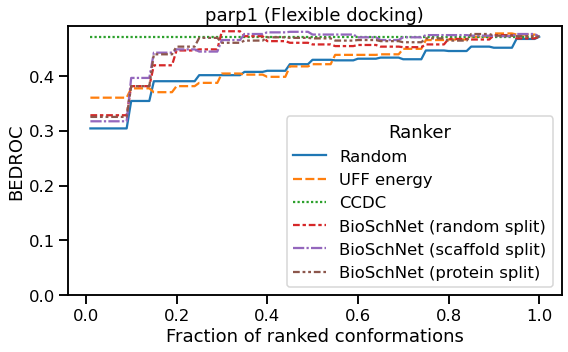

In [8]:
target = 'parp1'
plot_target(target, rigid=True)
plot_target(target, rigid=False)
plt.tight_layout()
plt.savefig('figures/cp3a4_rigid_dude.png', dpi=300)

flexible
rigid


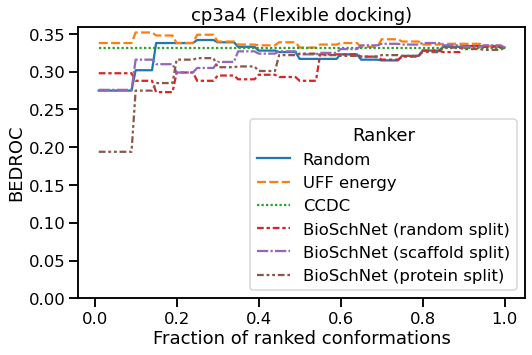

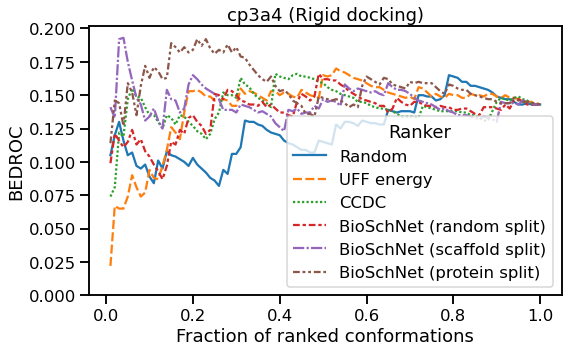

In [38]:
target = 'cp3a4'
plot_target(target, rigid=False)
plot_target(target, rigid=True)
# plt.axhline(0.33, label='Flexible docking', c='grey')
# plt.ylim(0, 0.34)
plt.tight_layout()
plt.savefig('figures/cp3a4_rigid_dude.png', dpi=300)

rigid


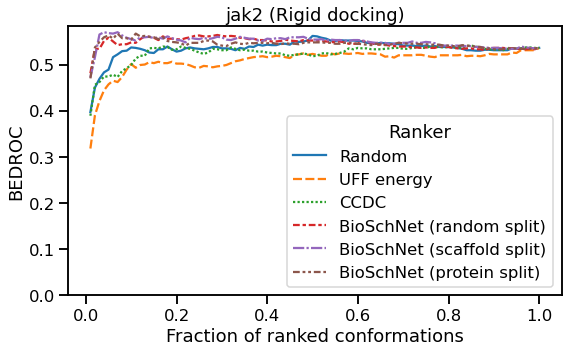

In [8]:
target = 'jak2'
# plot_target(target, rigid=False)
plot_target(target, rigid=True)
#plt.axhline(0.30, label='Flexible docking', c='grey')
plt.tight_layout()
plt.savefig('figures/jak2_rigid_dude.png', dpi=300)

flexible
rigid


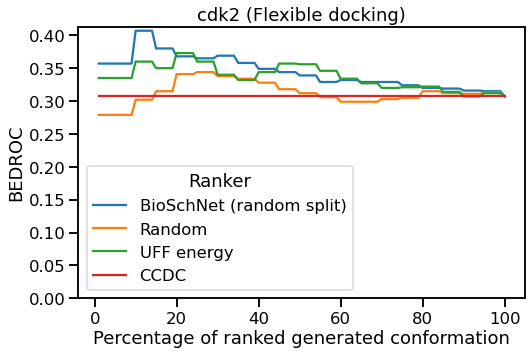

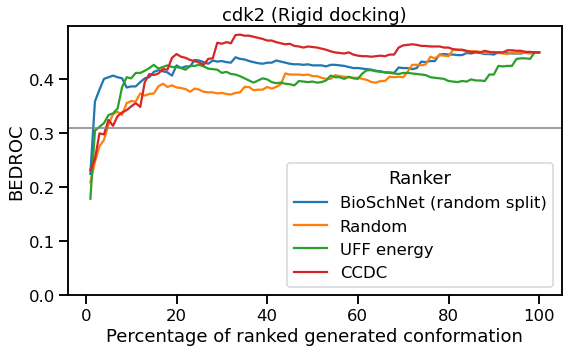

In [51]:
target = 'cdk2'
plot_target(target, rigid=False)
plot_target(target, rigid=True)
plt.axhline(0.31, label='Flexible docking', c='grey')
plt.tight_layout()
plt.savefig('figures/cdk2_rigid_dude.png', dpi=300)

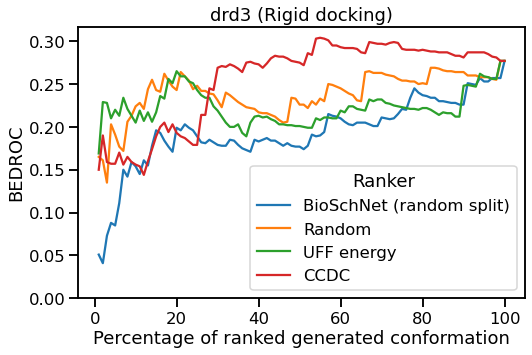

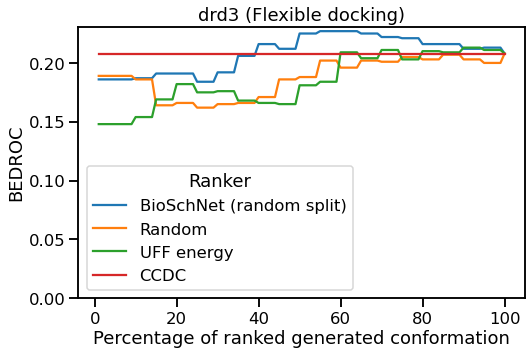

In [31]:
target = 'drd3'
plot_target(target)

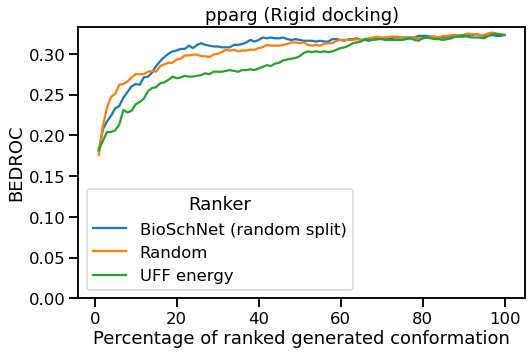

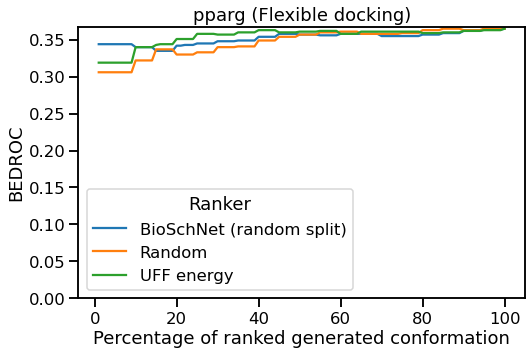

In [28]:
target = 'pparg'
plot_target(target)

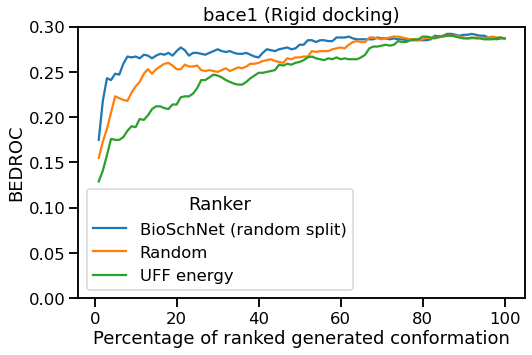

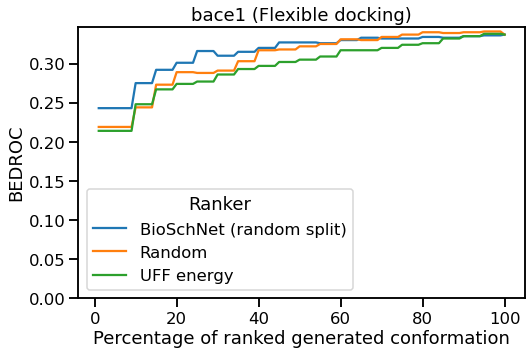

In [29]:
target = 'bace1'
plot_target(target)